In [1]:
import json
import pandas as pd
import re
import string
import numpy as np
import pickle
import time

## 0. Setup

Empezamos por abrir los archivos con el texto extraído y los metadatos de cada denuncia.

In [2]:
with open("../data/raw/text.json") as json_file:
    data = json.load(json_file)

df_text = pd.DataFrame(data)
# make sure there are no missing values
df_text.dropna(axis=0, how='any', inplace=True)

In [3]:
df_meta = pd.read_csv("../data/processed/metadata_train.csv", index_col=0)
# keep only what we need
df_meta = df_meta[["file_id", "VIOLENCIA_DE_GENERO"]]
# make sure there are no missing values
df_meta.dropna(axis=0, how='any', inplace=True)
df_meta

,file_id,VIOLENCIA_DE_GENERO
2290,1iJoBMJ_jtKAMq5XIQM2e-c4HSzq6dxo5,0
928,1x0WuR9ZpKEX1YcxfXhkhxL9rb_R1ZCl2iaZomqgwt-o,0
997,1YDySIWJ4CnM6hIZf5DknkGKION7XC0XU,0
945,1P2trppw3RGDx2_C-wpXBPYunozbpHsyV,1
2805,18vaGvR34NX2yvAQSZoAZyqFwB5mWler8,0
...,...,...
2286,1APoVdolaMAjjaF-Y0xTxPE0HWMSNXFGw,0
1380,1R_0NJMX1HX5OtPPYVJL6Vt04LiPSxa6Y,0
2534,1fKAUNdt3T8kkoiq_fxnApalrInfyAQzU,0
348,0B9wNhp3GjjazbW05a2hLMmVxaTA,0


In [4]:
df = pd.merge(df_meta, df_text, on='file_id', how='inner', right_index=True)
df

,file_id,VIOLENCIA_DE_GENERO,text
2290,1iJoBMJ_jtKAMq5XIQM2e-c4HSzq6dxo5,0,ACTA DE AUDIENCIA “NN s / art. 90 CP - lesione...
2291,1iJoBMJ_jtKAMq5XIQM2e-c4HSzq6dxo5,0,ACTA DE AUDIENCIA “NN s / art. 90 CP - lesione...
2292,1iJoBMJ_jtKAMq5XIQM2e-c4HSzq6dxo5,0,ACTA DE AUDIENCIA “NN s / art. 90 CP - lesione...
928,1x0WuR9ZpKEX1YcxfXhkhxL9rb_R1ZCl2iaZomqgwt-o,0,"ACTA DE AUDIENCIA “V, S SOBRE 4.1.22 EXHIBICIÓ..."
921,1x0WuR9ZpKEX1YcxfXhkhxL9rb_R1ZCl2iaZomqgwt-o,0,"ACTA DE AUDIENCIA “V, S SOBRE 4.1.22 EXHIBICIÓ..."
...,...,...,...
2103,1zm3sXC12rP1_g-gjPodkOIFOflnW5fVL,0,...
2964,1CnkgcXA2MiBdnhYvtc0MmcKsq53-ECrk,1,"ACTA DE AUDIENCIA “ XX s/art. 1, Ley 13944- I..."
1380,1R_0NJMX1HX5OtPPYVJL6Vt04LiPSxa6Y,0,Resumen: resolución interlocutoria por la que ...
348,0B9wNhp3GjjazbW05a2hLMmVxaTA,0,


## 1. Explorando el vectorizador

Necesitamos ahora decidir la forma en la que vamos a transformar el texto en datos. La aproximación que tendrá este proyecto será de la usar un vectorizador en el que casa término esté pesado por el inverso de la frecuencia con la que aparece en los documentos (TF-IDF por sus siglas en inglés).

In [13]:
# import the classes we created
from text_preprocessing import SpacyTokenizer, TextPreprocessor

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

spacy_tokenizer = SpacyTokenizer()

text_transformer = Pipeline(steps=[
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(max_df=0.9, 
                                   min_df=0.1,
                                   tokenizer = spacy_tokenizer)) ])

In [21]:
import time
start_time = time.time()
X = text_transformer.fit_transform(df.text)
print("--- %s minutes ---" % ((time.time() - start_time)/60))

--- 11.319346304734548 minutes ---


In [22]:
X

<3344x740 sparse matrix of type '<class 'numpy.float64'>'
	with 624885 stored elements in Compressed Sparse Row format>

In [23]:
text_transformer[1].vocabulary_

{'aire': 36,
 'junio': 416,
 'parir': 528,
 'resolver': 634,
 'presentar': 558,
 'causar': 99,
 'nro': 492,
 'cp': 189,
 'sobrar': 672,
 'declaracion': 217,
 'incompetencia': 372,
 'sra': 680,
 'presente': 559,
 'actuación': 16,
 'denunciar': 231,
 'formular': 332,
 'policia': 549,
 'ciudad': 117,
 'pasar': 533,
 'oportunidad': 512,
 'relatar': 622,
 '  ': 0,
 'domiciliar': 259,
 'ubicar': 715,
 'callar': 88,
 'infraccion': 381,
 'nombrar': 484,
 'cometer': 126,
 'vehicular': 725,
 'marcar': 451,
 'coincidir': 123,
 'particular': 532,
 'agregar': 34,
 'ndeg': 480,
 'sedar': 654,
 'fiscalia': 330,
 'fiscal': 329,
 'solicitar': 674,
 'declarar': 218,
 'entender': 282,
 'legajola': 429,
 'justicia': 421,
 'nacional': 477,
 'considerar': 156,
 'encuadrar': 280,
 'figurar': 320,
 'prever': 566,
 'inc': 367,
 'codigo': 122,
 'penal': 537,
 'establecer': 292,
 'prision': 573,
 'ano': 46,
 'objetar': 495,
 'registrar': 615,
 'acordar': 11,
 'ley': 431,
 'fundamentar': 338,
 'delito': 228,
 'fu

## 2. Clasificación

Ahora que ya tenemos una forma de representar el texto como datos podemos usar este resultado para aprender a clasificar las denuncias de acuerdo a la presencia de **violencia de género**. Primero exploraremos solo un modelo.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 

In [16]:
y = df["VIOLENCIA_DE_GENERO"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.text, 
                                                    y.astype(int), 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True)

In [98]:
# exploring a complete Pipe. This will refit the vectorizer again
# this is not what we want, but we can explore
model_pipe = Pipeline(steps=[
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(max_df=0.9, 
                                   min_df=0.1,
                                   tokenizer = spacy_tokenizer)),
    ('model', LogisticRegression(solver='liblinear',
                                 max_iter=1000))
])

In [99]:
import time
start_time = time.time()

model_pipe.fit(X_train,y_train)
y_train_hat = model_pipe.predict(X_train)
y_test_hat = model_pipe.predict(X_test)


print("\n**** Results Report for %s model ****\n" %str(model))
print(" Training Accuracy: %s" %accuracy_score(y_train,y_train_hat))
print(" Test Accuracy: %s \n" %accuracy_score(y_test,y_test_hat))
print(" Training F1: %s" %f1_score(y_train,y_train_hat))
print(" Test F1: %s \n" %f1_score(y_test,y_test_hat))
print(" Training Precision: %s" %precision_score(y_train,y_train_hat))
print(" Test Precision: %s \n" %precision_score(y_test,y_test_hat))
print(" Training Recall: %s" %recall_score(y_train,y_train_hat))
print(" Test Recall: %s \n" %recall_score(y_test,y_test_hat))

print("--- %s minutes ---" % ((time.time() - start_time)/60))


**** Results Report for {'model': RandomForestClassifier(), 'parameters': {'n_estimators': (10, 100, 200), 'max_depth': (None, 10, 20), 'max_features': ('auto', 'log2')}, 'best_model': GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': (None, 10, 20),
                         'max_features': ('auto', 'log2'),
                         'n_estimators': (10, 100, 200)},
             scoring='accuracy')} model ****

 Training Accuracy: 0.891588785046729
 Test Accuracy: 0.8804185351270553 

 Training F1: 0.7709320695102687
 Test F1: 0.7575757575757576 

 Training Precision: 0.8856624319419237
 Test Precision: 0.8445945945945946 

 Training Recall: 0.6825174825174826
 Test Recall: 0.6868131868131868 

--- 20.617629226048788 minutes ---


In [64]:
# Without a Pipe

# model = LogisticRegression(solver='liblinear', max_iter=1000)

# model.fit(X_train,y_train)
# y_train_hat = model.predict(X_train)
# y_test_hat = model.predict(X_test)


# print("\n**** Results Report for %s model ****\n" %str(model))
# print(" Training Accuracy: %s" %accuracy_score(y_train,y_train_hat))
# print(" Test Accuracy: %s \n" %accuracy_score(y_test,y_test_hat))
# print(" Training F1: %s" %f1_score(y_train,y_train_hat))
# print(" Test F1: %s \n" %f1_score(y_test,y_test_hat))
# print(" Training Precision: %s" %precision_score(y_train,y_train_hat))
# print(" Test Precision: %s \n" %precision_score(y_test,y_test_hat))
# print(" Training Recall: %s" %recall_score(y_train,y_train_hat))
# print(" Test Recall: %s \n" %recall_score(y_test,y_test_hat))


**** Results Report for LogisticRegression(max_iter=1000, solver='liblinear') model ****

 Training Accuracy: 0.8908411214953271
 Test Accuracy: 0.8804185351270553 

 Training F1: 0.768621236133122
 Test F1: 0.7575757575757576 

 Training Precision: 0.886654478976234
 Test Precision: 0.8445945945945946 

 Training Recall: 0.6783216783216783
 Test Recall: 0.6868131868131868 



## 3. Múltiples modelos

Ahora vamos a considerar múltiples modelos y múltiples opciones de parámetros para estos. Usaremes cross-validation múltiples veces con el fin de encontrar el modelo y el set de parámetros con mejores puntajes.

In [18]:
# vectorize text
X_train = text_transformer.fit_transform(X_train)
X_test = text_transformer.transform(X_test)

In [21]:
with open('../models/gender_violence_vectorizer.sav', 'wb') as f:
    pickle.dump(text_transformer, f)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# define candidate models and pipe
LR = LogisticRegression(solver='liblinear', max_iter=1000)
KN = KNeighborsClassifier()
NB = MultinomialNB()
RF = RandomForestClassifier()

# define parameters for CV
params_RF = {'n_estimators': (10, 100),
             'max_depth': (10, 20),
             'max_features': ('auto', 'log2')
             }

params_KN = {'n_neighbors': (1, 3, 5),
             'weights': ('distance', 'uniform')
             }

params_LR = {'penalty': ('l1', 'l2'),
            'class_weight': ('balanced', None)}

params_NB = {'alpha': (0.5, 1)}

models = {"LR": {"model": LR, "parameters": params_LR},
          "NB": {"model": NB, "parameters": params_NB},
          "KN": {"model": KN, "parameters": params_KN},
          "RF": {"model": RF, "parameters": params_RF}
         }

In [23]:
# # Pipeline approach

# LR_pipe = Pipeline(steps=[
#     ('preprocessor', TextPreprocessor()),
#     ('vectorizer', TfidfVectorizer(max_df=0.9, 
#                                    min_df=0.1,
#                                    tokenizer = spacy_tokenizer)),
#     ('model', LR)
# ])

# KN_pipe = Pipeline(steps=[
#     ('preprocessor', TextPreprocessor()),
#     ('vectorizer', TfidfVectorizer(max_df=0.9, 
#                                    min_df=0.1,
#                                    tokenizer = spacy_tokenizer)),
#     ('model', KN)
# ])

# NB_pipe = Pipeline(steps=[
#     ('preprocessor', TextPreprocessor()),
#     ('vectorizer', TfidfVectorizer(max_df=0.9, 
#                                    min_df=0.1,
#                                    tokenizer = spacy_tokenizer)),
#     ('model', NB)
# ])


# RF_pipe = Pipeline(steps=[
#     ('preprocessor', TextPreprocessor()),
#     ('vectorizer', TfidfVectorizer(max_df=0.9, 
#                                    min_df=0.1,
#                                    tokenizer = spacy_tokenizer)),
#     ('model', RF)
# ])

# # define parameters for CV
# params_RF = {'model__n_estimators': (10, 100, 200),
#              'model__max_depth': (None, 10, 20),
#              'model__max_features': ('auto', 'log2')
#              }

# params_KN = {'model__n_neighbors': (1, 3, 5),
#              'model__weights': ('distance', 'uniform')
#              }

# params_LR = {'model__penalty': ('l1', 'l2'),
#             'model__class_weight': ('balanced', None)}

# params_NB = {'model__alpha': (0.5, 1)}

# models = {"LR": {"model": LR_pipe, "parameters": params_LR},
#           "NB": {"model": NB_pipe, "parameters": params_NB},
#           "KN": {"model": KN_pipe, "parameters": params_KN},
#           "RF": {"model": RF_pipe, "parameters": params_RF}
#          }

In [31]:
# loop through the models
for name, model in models.items():
    
    start_time = time.time()
    
    best_model = GridSearchCV(model["model"],
                              model["parameters"], 
                              cv=3,
                              scoring="accuracy", 
                              verbose=0)
    
    best_model.fit(X_train,y_train)
    
    #save the best model
    models[name]["best_model"] = best_model
    
    y_train_hat = best_model.predict(X_train)
    y_test_hat = best_model.predict(X_test)


    print("\n**** Results Report for %s model ****\n" %str(model["model"]))
    print(" Training Accuracy: %s" %accuracy_score(y_train,y_train_hat))
    print(" Test Accuracy: %s \n" %accuracy_score(y_test,y_test_hat))
    print(" Training F1: %s" %f1_score(y_train,y_train_hat))
    print(" Test F1: %s \n" %f1_score(y_test,y_test_hat))
    print(" Training Precision: %s" %precision_score(y_train,y_train_hat))
    print(" Test Precision: %s \n" %precision_score(y_test,y_test_hat))
    print(" Training Recall: %s" %recall_score(y_train,y_train_hat))
    print(" Test Recall: %s \n" %recall_score(y_test,y_test_hat))

    print("--- %s minutes ---" % ((time.time() - start_time)/60))


**** Results Report for LogisticRegression(max_iter=1000, solver='liblinear') model ****

 Training Accuracy: 0.8853344412131283
 Test Accuracy: 0.8887043189368771 

 Training F1: 0.7548845470692718
 Test F1: 0.7912772585669782 

 Training Precision: 0.8744855967078189
 Test Precision: 0.8581081081081081 

 Training Recall: 0.6640625
 Test Recall: 0.7341040462427746 

--- 0.007731942335764567 minutes ---

**** Results Report for MultinomialNB() model ****

 Training Accuracy: 0.8458662235147486
 Test Accuracy: 0.845514950166113 

 Training F1: 0.6900584795321637
 Test F1: 0.7240356083086052 

 Training Precision: 0.7414721723518851
 Test Precision: 0.7439024390243902 

 Training Recall: 0.6453125
 Test Recall: 0.7052023121387283 

--- 0.0009935935338338216 minutes ---

**** Results Report for KNeighborsClassifier() model ****

 Training Accuracy: 0.9891981719983381
 Test Accuracy: 0.8687707641196013 

 Training F1: 0.9794303797468354
 Test F1: 0.7696793002915452 

 Training Precision:

In [79]:
# SELECT BEST MODEL
with open('../models/gender_violence.sav', 'wb') as f:
    pickle.dump(models["RF"]["best_model"], f)

## 4. Términos más relevantes

Finalmente, podemos interrogar nuestro modelo para entender cuáles son los términos más relevantes a la hora de predecir la presencia de violencia de género en una denuncia. Podemos hacer esto en cualquiera de los modelos que ya entrenamos

### Regresión logística

In [34]:
model = models["LR"]["best_model"].best_estimator_
model

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [36]:
K = 20
top = np.flip(np.argsort(model.coef_[0]))[:K]
top_words = [text_transformer[1].get_feature_names()[i] for i in top]
top_coef = np.flip(np.sort(model.coef_[0]))[:K]

for word, coef in zip(top_words,top_coef):
    print(word, coef)

violencia 23.043215189676193
contactar 7.992691210576462
taller 5.668720492819018
incumplimiento 5.42381372579895
denunciante 4.640121686325034
bis 4.35447942513845
hijo 4.069523111316983
agravar 3.4507906731326994
asistencia 3.0176297957023346
sra 2.743168065255537
amenazar 2.4925788893125804
justicia 2.07294633318337
probar 1.9558406416150014
cualquiera 1.5794968913286263
acordar 1.3675358879820936
humano 1.3151336917201215
mes 1.288564539337427
tribunal 1.2359156314658302
cuestionar 1.1954637418012277
legajo 1.0375336016715473


### Bosques aleatoreos

In [7]:
# load vectorizer
import pickle
vect_path = str("../models/gender_violence_vectorizer.sav")
with open(vect_path, 'rb') as f:
    text_transformer = pickle.load(f)
    print(text_transformer)

Pipeline(steps=[('preprocessor',
                 <text_preprocessing.TextPreprocessor object at 0x7ffb18dd7220>),
                ('vectorizer',
                 TfidfVectorizer(max_df=0.85, min_df=0.1,
                                 tokenizer=<text_preprocessing.SpacyTokenizer object at 0x7ffb18b6c4f0>))])


In [2]:
# load best model
model_path = str("../models/gender_violence_model.sav")
with open(model_path, 'rb') as f:
    gender_violence_model = pickle.load(f)

In [21]:
model = gender_violence_model.best_estimator_
gender_violence_model.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

In [33]:
K = 15
top = np.flip(np.argsort(model.feature_importances_))[:K]
top_words = [text_transformer[1].get_feature_names()[i] for i in top]
top_coef = np.flip(np.sort(model.feature_importances_))[:K]

for word, coef in zip(top_words, top_coef):
    print(word, coef)

violencia 0.052949398208860375
denunciante 0.03631769077238931
amenazar 0.027432092949443963
contexto 0.022732263726233746
taller 0.019292373278381778
contactar 0.018266541277724802
hijo 0.016428317378987742
mujer 0.016391065983610502
victimar 0.015889771385634435
generar 0.015793100699902828
parejo 0.014129938483300956
bis 0.010931279736667592
familiar 0.010749419347212501
denunciar 0.009817684969207034
tomar 0.007942896967468494


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

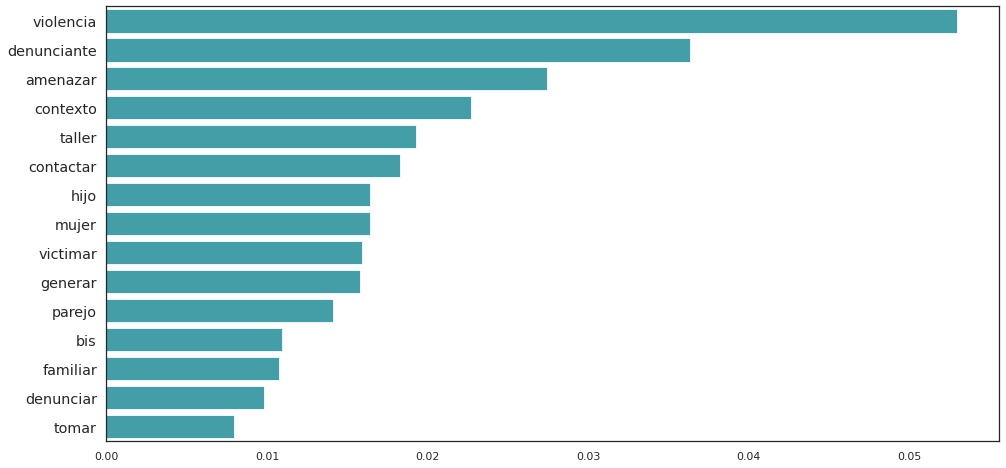

In [35]:
plt.figure(figsize=(16, 8))
sns.set(style='white')
sns.barplot(top_coef, top_words,
            color='#0097a7', alpha=0.8)
#plt.title('Most used #Hashtags')
plt.yticks(fontsize='large')
plt.show()